In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/Copy of diabetes (1) (2) (1) (1).csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
data['Outcome'].unique()

array([1, 0])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.shape

(768, 9)

In [10]:
corr_matrix = data.corr()['Outcome']

In [11]:
corr_matrix

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [12]:
x = data.drop('Outcome' , axis=1)
y = data['Outcome']

In [13]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25,random_state=0)

In [15]:
y_train.value_counts()

0    370
1    206
Name: Outcome, dtype: int64

In [17]:
#Model with implementing of SMOTE
#SMOTE for data balancing - Synthetic Minority Over- Sampling Technique

from imblearn.over_sampling import SMOTE

sm = SMOTE()


In [18]:
x_res, y_res = sm.fit_resample(x_train, y_train) #here both class 0 and class 1 are 236.data is balanced

y_res.value_counts()

0    370
1    370
Name: Outcome, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)
x_res = sd.fit_transform(x_res)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [22]:
training_score = model.score(x_train,y_train)
training_score

0.7638888888888888

In [24]:
testing_score = model.score(x_test,y_test)
testing_score

0.796875

Best training score and best testing score so it is a best model there is no overfit and underfit


In [25]:
from sklearn.metrics import accuracy_score
ascore = accuracy_score(y_test,y_pred)
ascore

0.796875

In [26]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("MSC: ",mse)

MSC:  0.203125


In [29]:
from sklearn.metrics import precision_score

In [31]:
#calculate prediction
precision = precision_score(y_test, y_pred ,average='binary')
print('Precision: %3f' % precision)

Precision: 0.734694


Again running the example calculates the precision for the multicalss example matching our manual calcualtion


In [32]:
precision = precision_score(y_test,y_pred , labels=[0,1], average='micro')
print('Precision: %3f' %precision)

Precision: 0.796875


In [33]:
#calculate recall for 1:100 dataset with 90 tp and 10fn
from sklearn.metrics import recall_score


In [34]:
recall = recall_score(y_test,y_pred,average='binary')
print('Recall: %3f' %recall)

Recall: 0.580645


In [36]:
#calcualtes f1 for 1:100 dataset with 95tp,5fn,55fp
from sklearn.metrics import f1_score

#calculates score
score = f1_score(y_test, y_pred,average='binary')
print('F-measure: %.3f' %score)

F-measure: 0.649


In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7403225806451613

In [38]:
#over sampled

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_res , y_res)
y_pred1 = model1.predict(x_test)
y_pred1

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [39]:
from sklearn.metrics import accuracy_score
ascore = accuracy_score(y_test,y_pred1)
ascore

0.7447916666666666

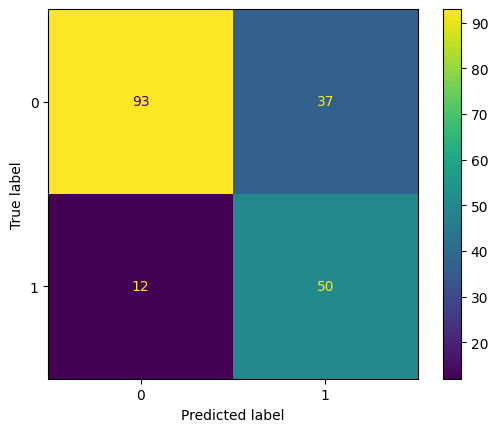

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       130
           1       0.57      0.81      0.67        62

    accuracy                           0.74       192
   macro avg       0.73      0.76      0.73       192
weighted avg       0.79      0.74      0.75       192



In [ ]:
https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [42]:
x = 1j

print(x**2 == -1)

True
